<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/1_Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.random(20) # random value betn 0 and 1 

array([0.13829008, 0.64607288, 0.31573866, 0.85387119, 0.28457235,
       0.52391936, 0.9051696 , 0.84254501, 0.68757721, 0.3780713 ,
       0.43992458, 0.7700165 , 0.13716971, 0.12737483, 0.00140769,
       0.44724824, 0.33593727, 0.19085076, 0.6909983 , 0.1646405 ])

In [17]:
# we would like to generate 20 data points
N = 20

# random data on the x-axix in (-5, 5)
X = np.random.random(N) * 10 -5 

# a line plus some noise
# when we introduce gaussian noise the MSE becomes the correct error function to use
Y = 0.5 * X - 1 + np.random.randn(N)


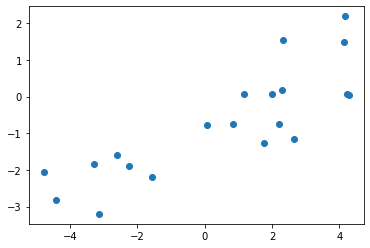

In [9]:
plt.scatter(X, Y)

In [22]:
# Create the linear regression model
model = nn.Linear(1, 1) # 1 input and 1 output
 
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [15]:
list(model.parameters()) # m and b

[Parameter containing:
 tensor([[-0.0864]], requires_grad=True), Parameter containing:
 tensor([-0.1283], requires_grad=True)]

In [19]:
# In ML we want our data to be of shape:
# (num_samples X num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# Pytorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [20]:
type(inputs)

torch.Tensor

In [23]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  # loss is a single python number and not a np array
  # so when the tensor is a single number and we want to bring
  # it back to python land we use item()
  losses.append(loss.item())  # item() method extracts the loss’s value as a Python float.

  # backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {it + 1}/{n_epochs}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 4.7613
Epoch 2/30, Loss: 3.1058
Epoch 3/30, Loss: 2.2576
Epoch 4/30, Loss: 1.7110
Epoch 5/30, Loss: 1.3497
Epoch 6/30, Loss: 1.1103
Epoch 7/30, Loss: 0.9516
Epoch 8/30, Loss: 0.8464
Epoch 9/30, Loss: 0.7767
Epoch 10/30, Loss: 0.7305
Epoch 11/30, Loss: 0.6999
Epoch 12/30, Loss: 0.6796
Epoch 13/30, Loss: 0.6661
Epoch 14/30, Loss: 0.6572
Epoch 15/30, Loss: 0.6513
Epoch 16/30, Loss: 0.6474
Epoch 17/30, Loss: 0.6448
Epoch 18/30, Loss: 0.6431
Epoch 19/30, Loss: 0.6419
Epoch 20/30, Loss: 0.6412
Epoch 21/30, Loss: 0.6407
Epoch 22/30, Loss: 0.6403
Epoch 23/30, Loss: 0.6401
Epoch 24/30, Loss: 0.6400
Epoch 25/30, Loss: 0.6399
Epoch 26/30, Loss: 0.6398
Epoch 27/30, Loss: 0.6398
Epoch 28/30, Loss: 0.6397
Epoch 29/30, Loss: 0.6397
Epoch 30/30, Loss: 0.6397


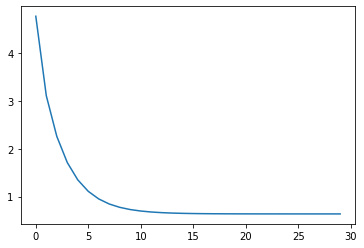

In [24]:
# plot the loss per iteration
plt.plot(losses)

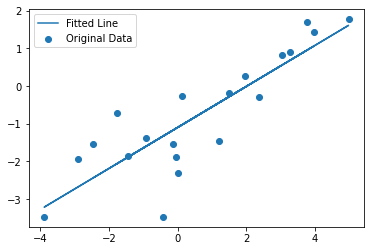

In [25]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original Data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [26]:
model(inputs).numpy()

RuntimeError: ignored

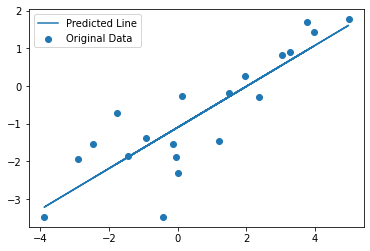

In [28]:
# Another way taking hint from the error
with torch.no_grad():
  out = model(inputs).numpy()

plt.scatter(X, Y, label='Original Data')
plt.plot(X, out, label='Predicted Line')
plt.legend()
plt.show()

In [32]:
model.weight.data

tensor([[0.5434]])

In [29]:
# Important:
# In order to test the efficacy of our model, synthetic data is useful

w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.54339993]] [-1.0985274]
